# Explore here

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

print(data.head())
print(data.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

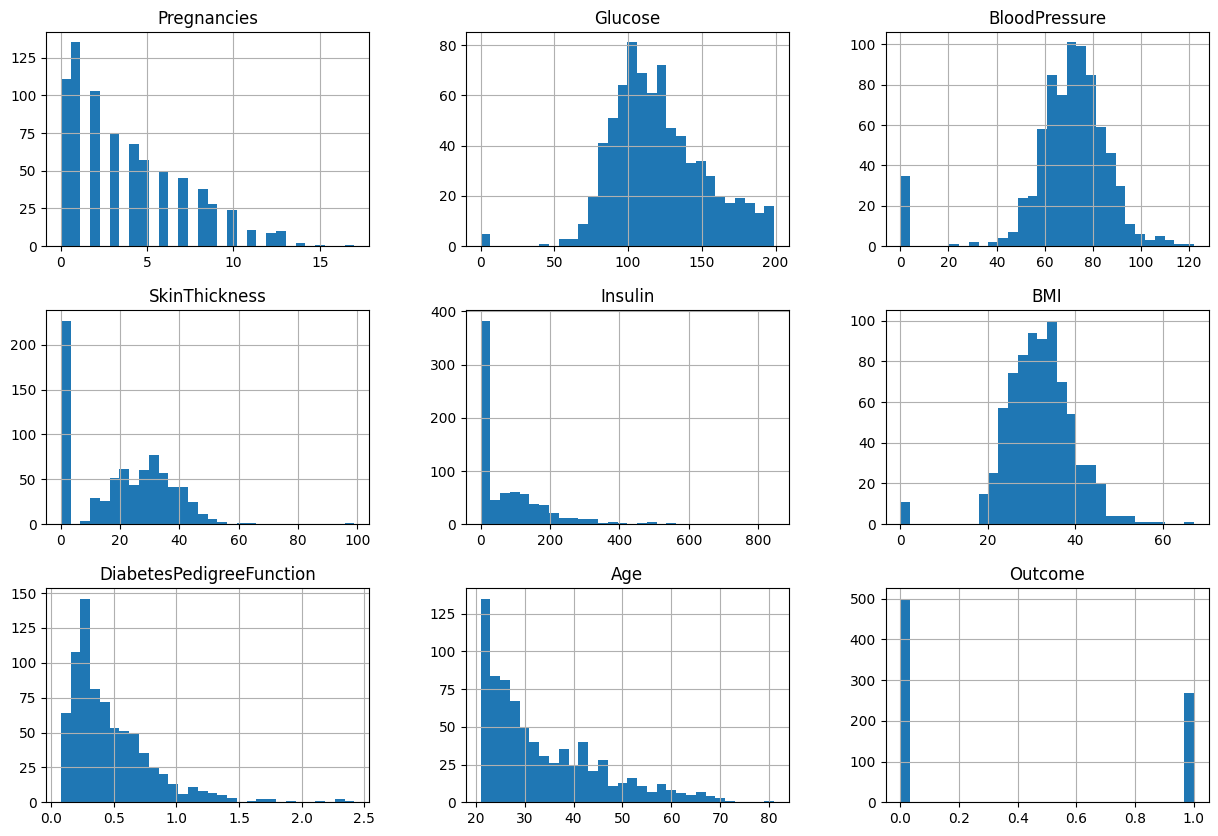

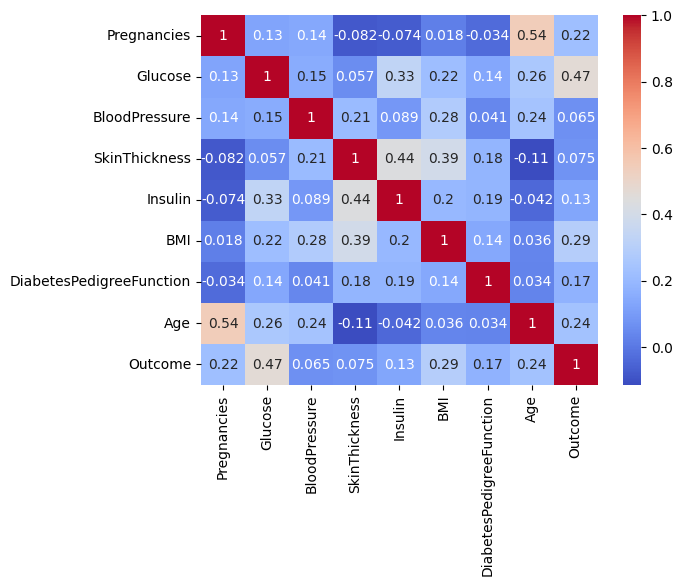

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

print(data.describe())

data.hist(bins=30, figsize=(15, 10))
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


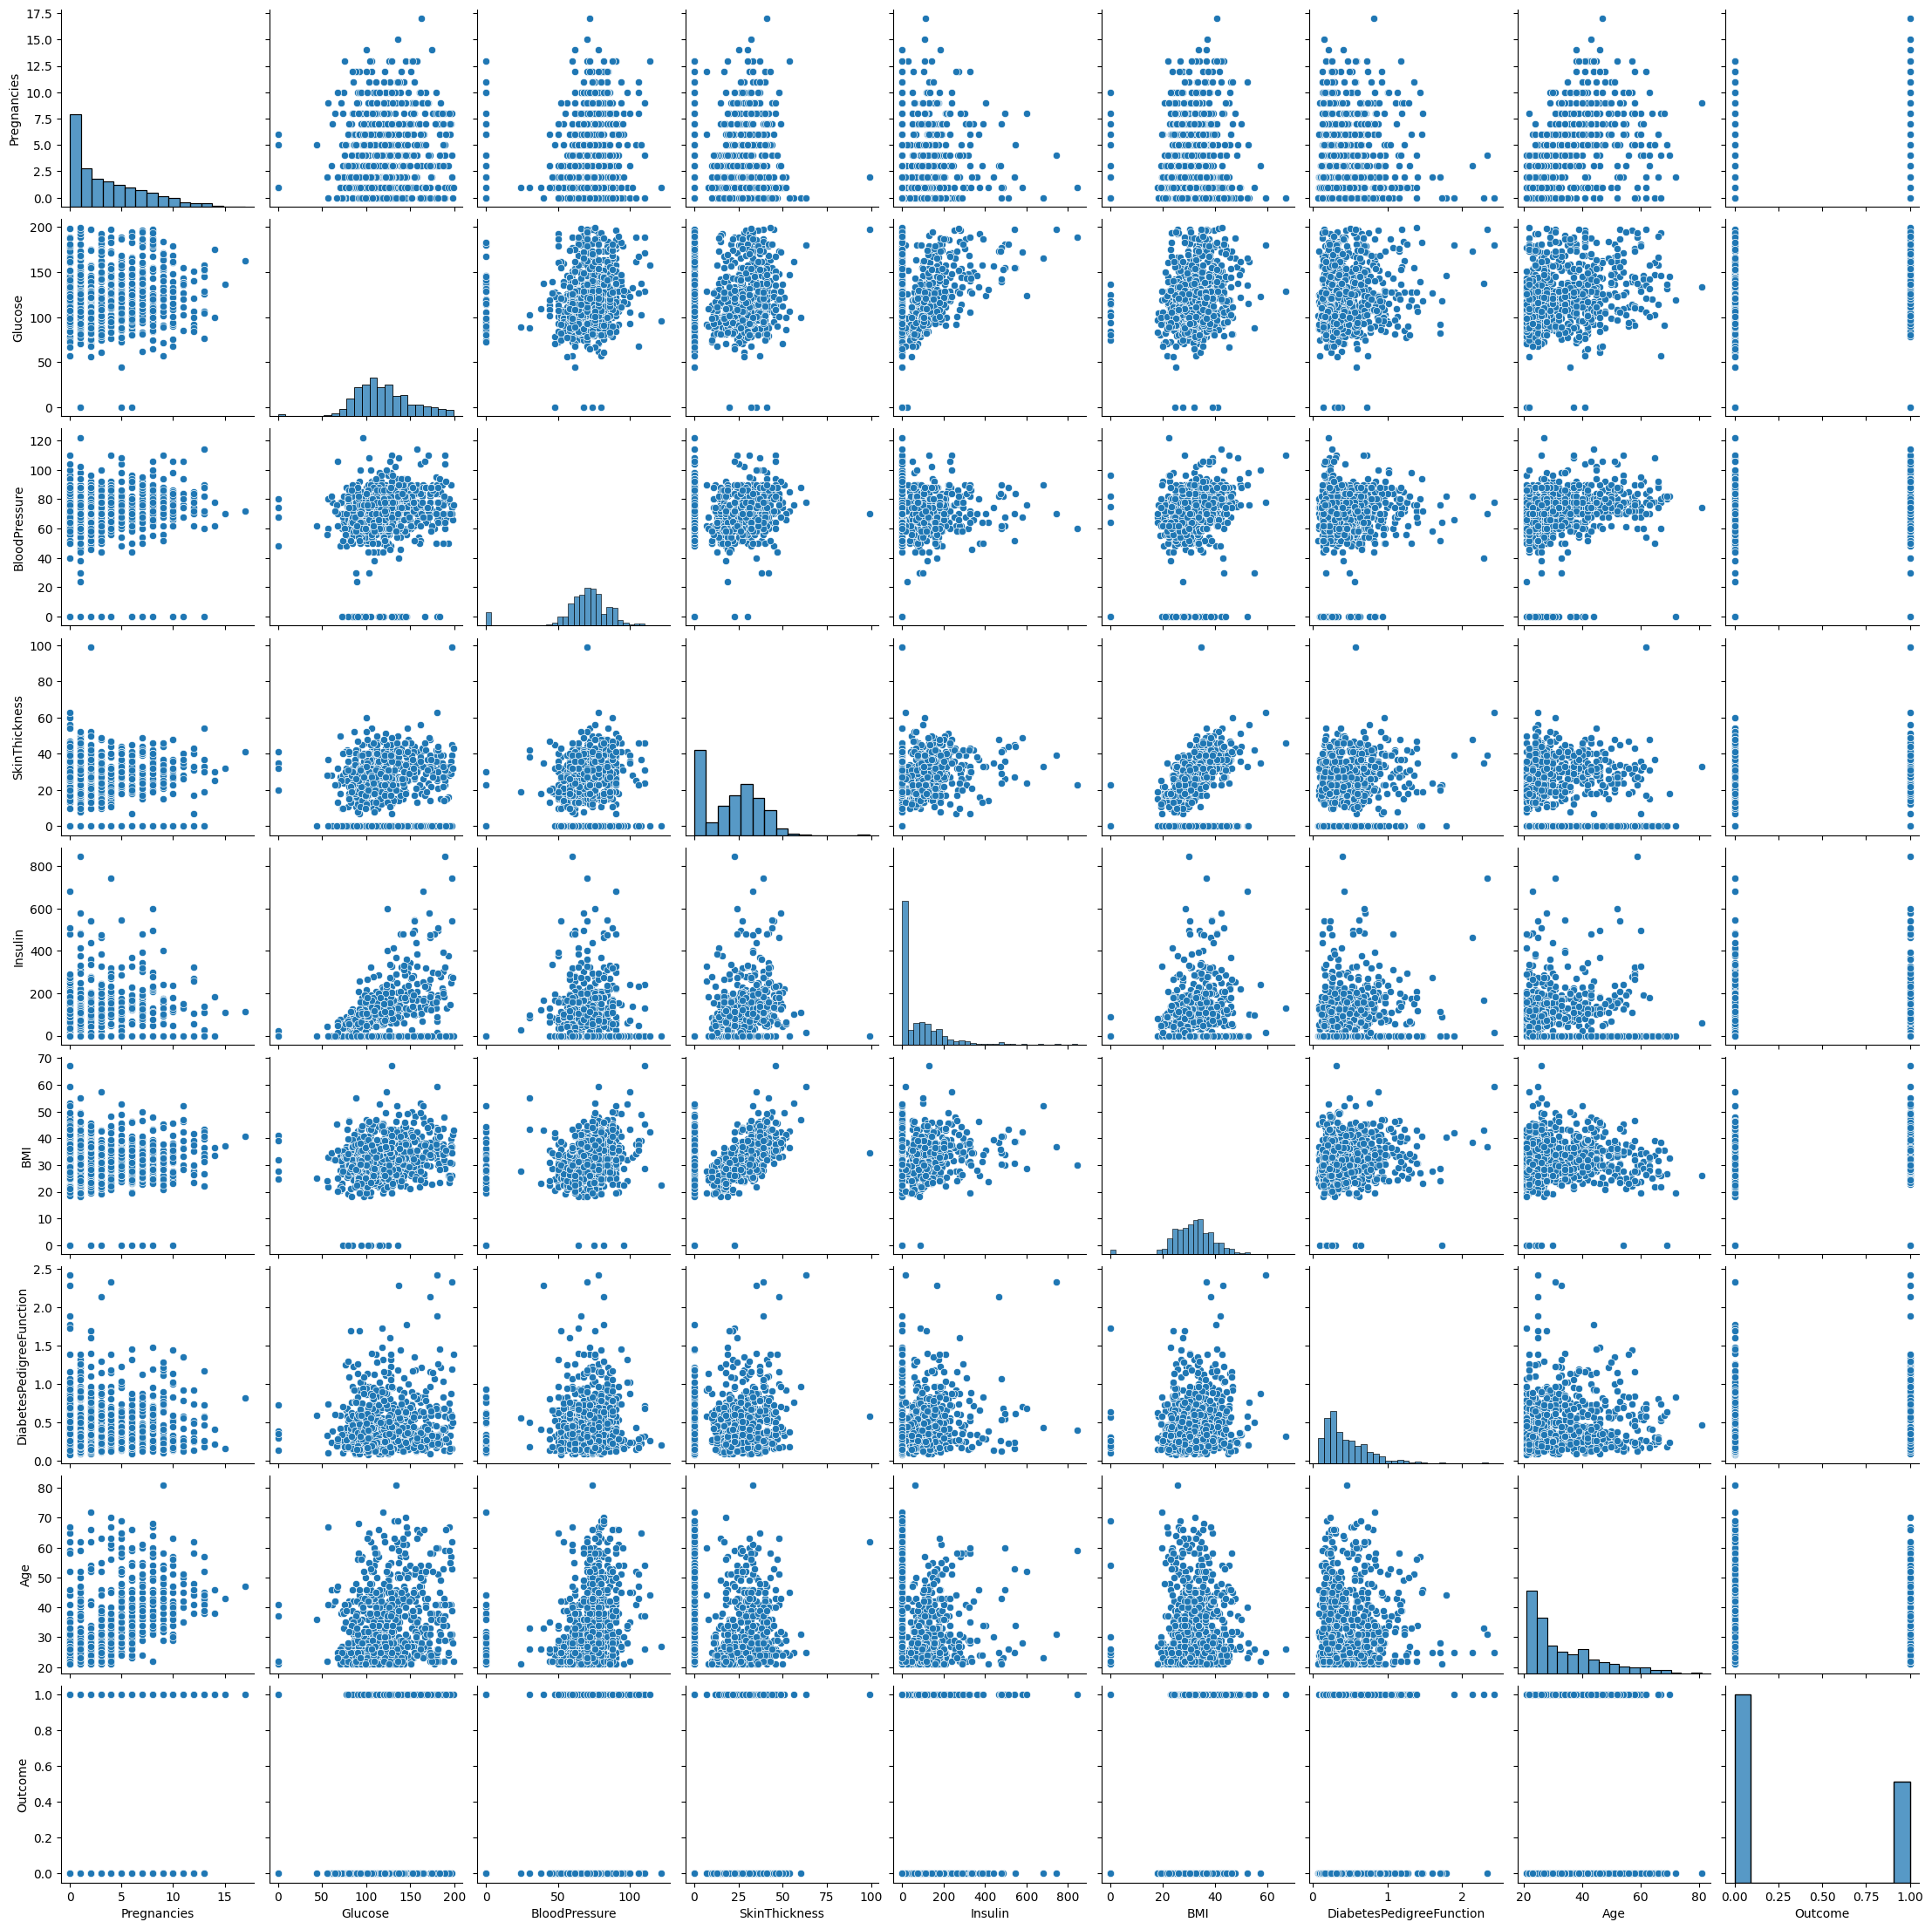

In [10]:
sns.pairplot(data = data)

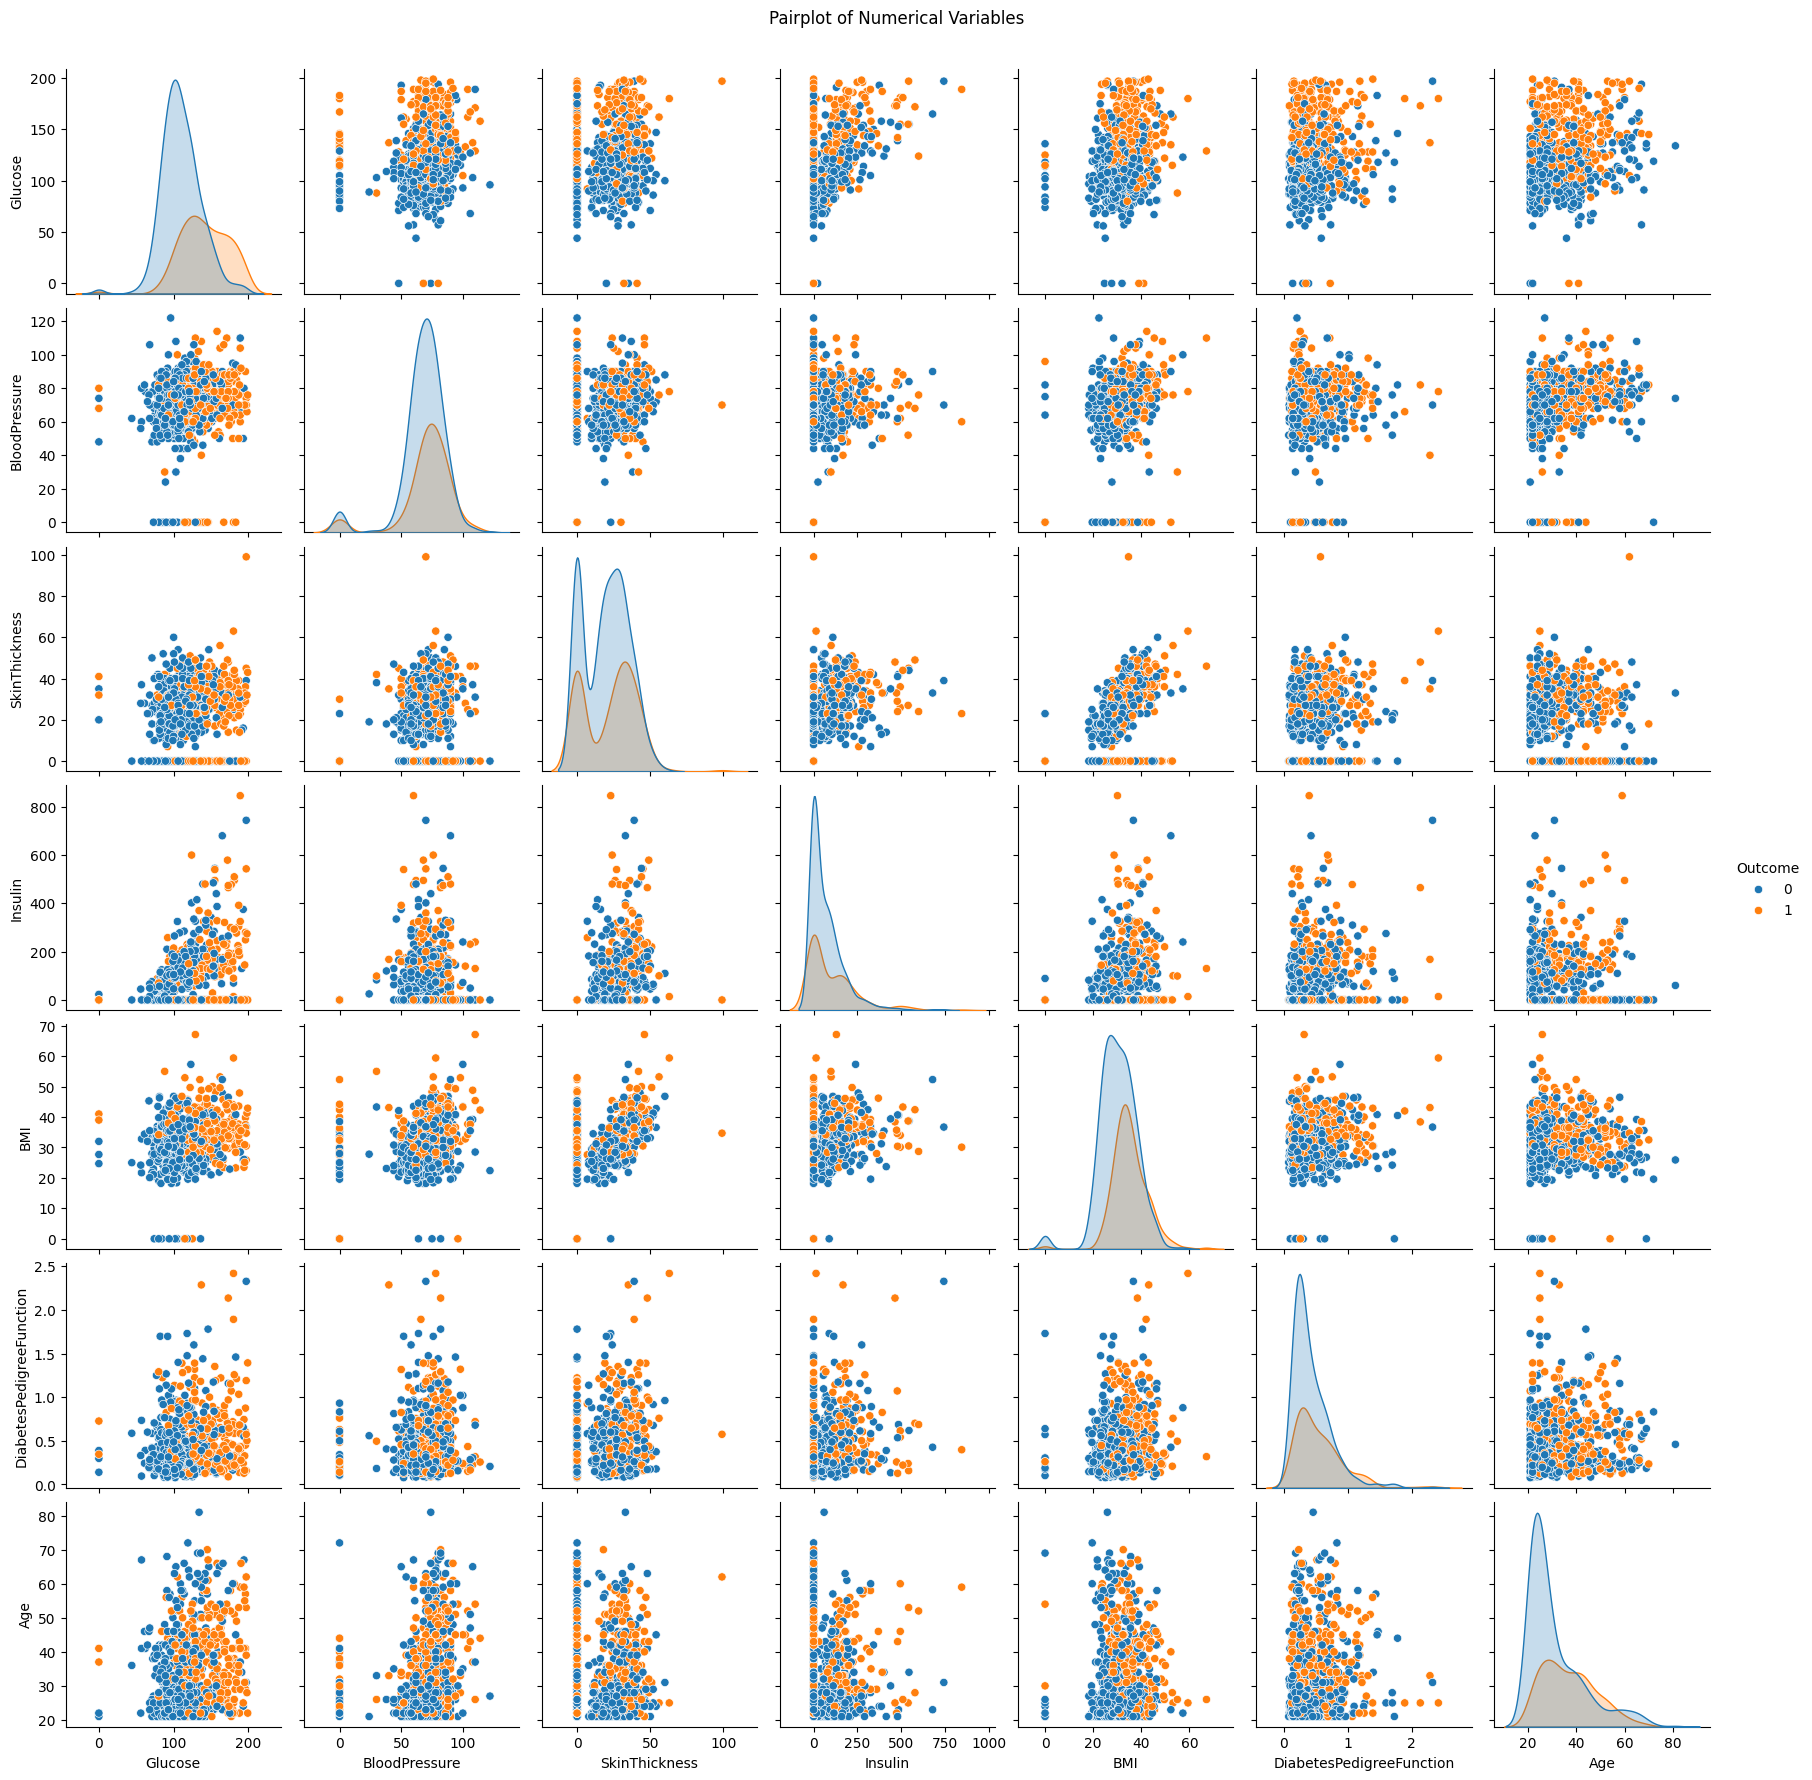

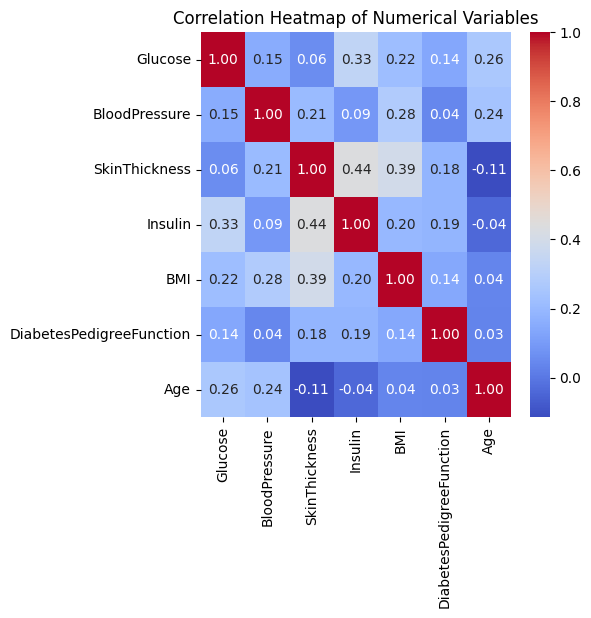

In [15]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

# Creando pairplot para explorar las relaciones entre las variables numéricas
sns.pairplot(data, vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Calcular la matriz de correlación
correlation_matrix = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


Insulin y SkinThickness: Estas variables muestran una correlación relativamente alta (0.44), lo que indica que podrían compartir información similar sobre los pacientes. 

BMI y SkinThickness: Otra correlación notable del 0.39, sugiriendo que ambas variables están relacionadas y podrían estar informando aspectos similares de la salud física relacionados con la diabetes.

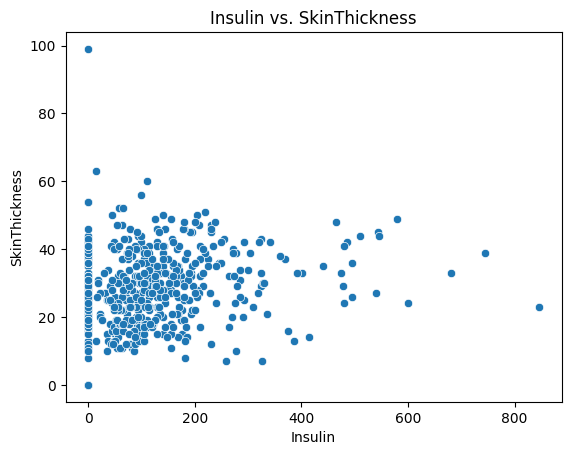

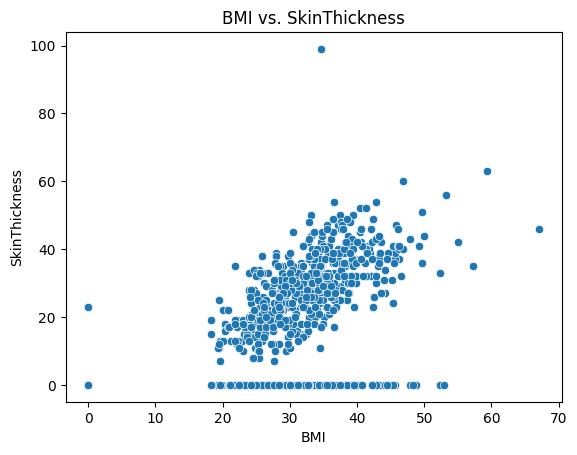

In [17]:

sns.scatterplot(data=data, x='Insulin', y='SkinThickness')
plt.title('Insulin vs. SkinThickness')
plt.show()

sns.scatterplot(data=data, x='BMI', y='SkinThickness')
plt.title('BMI vs. SkinThickness')
plt.show()

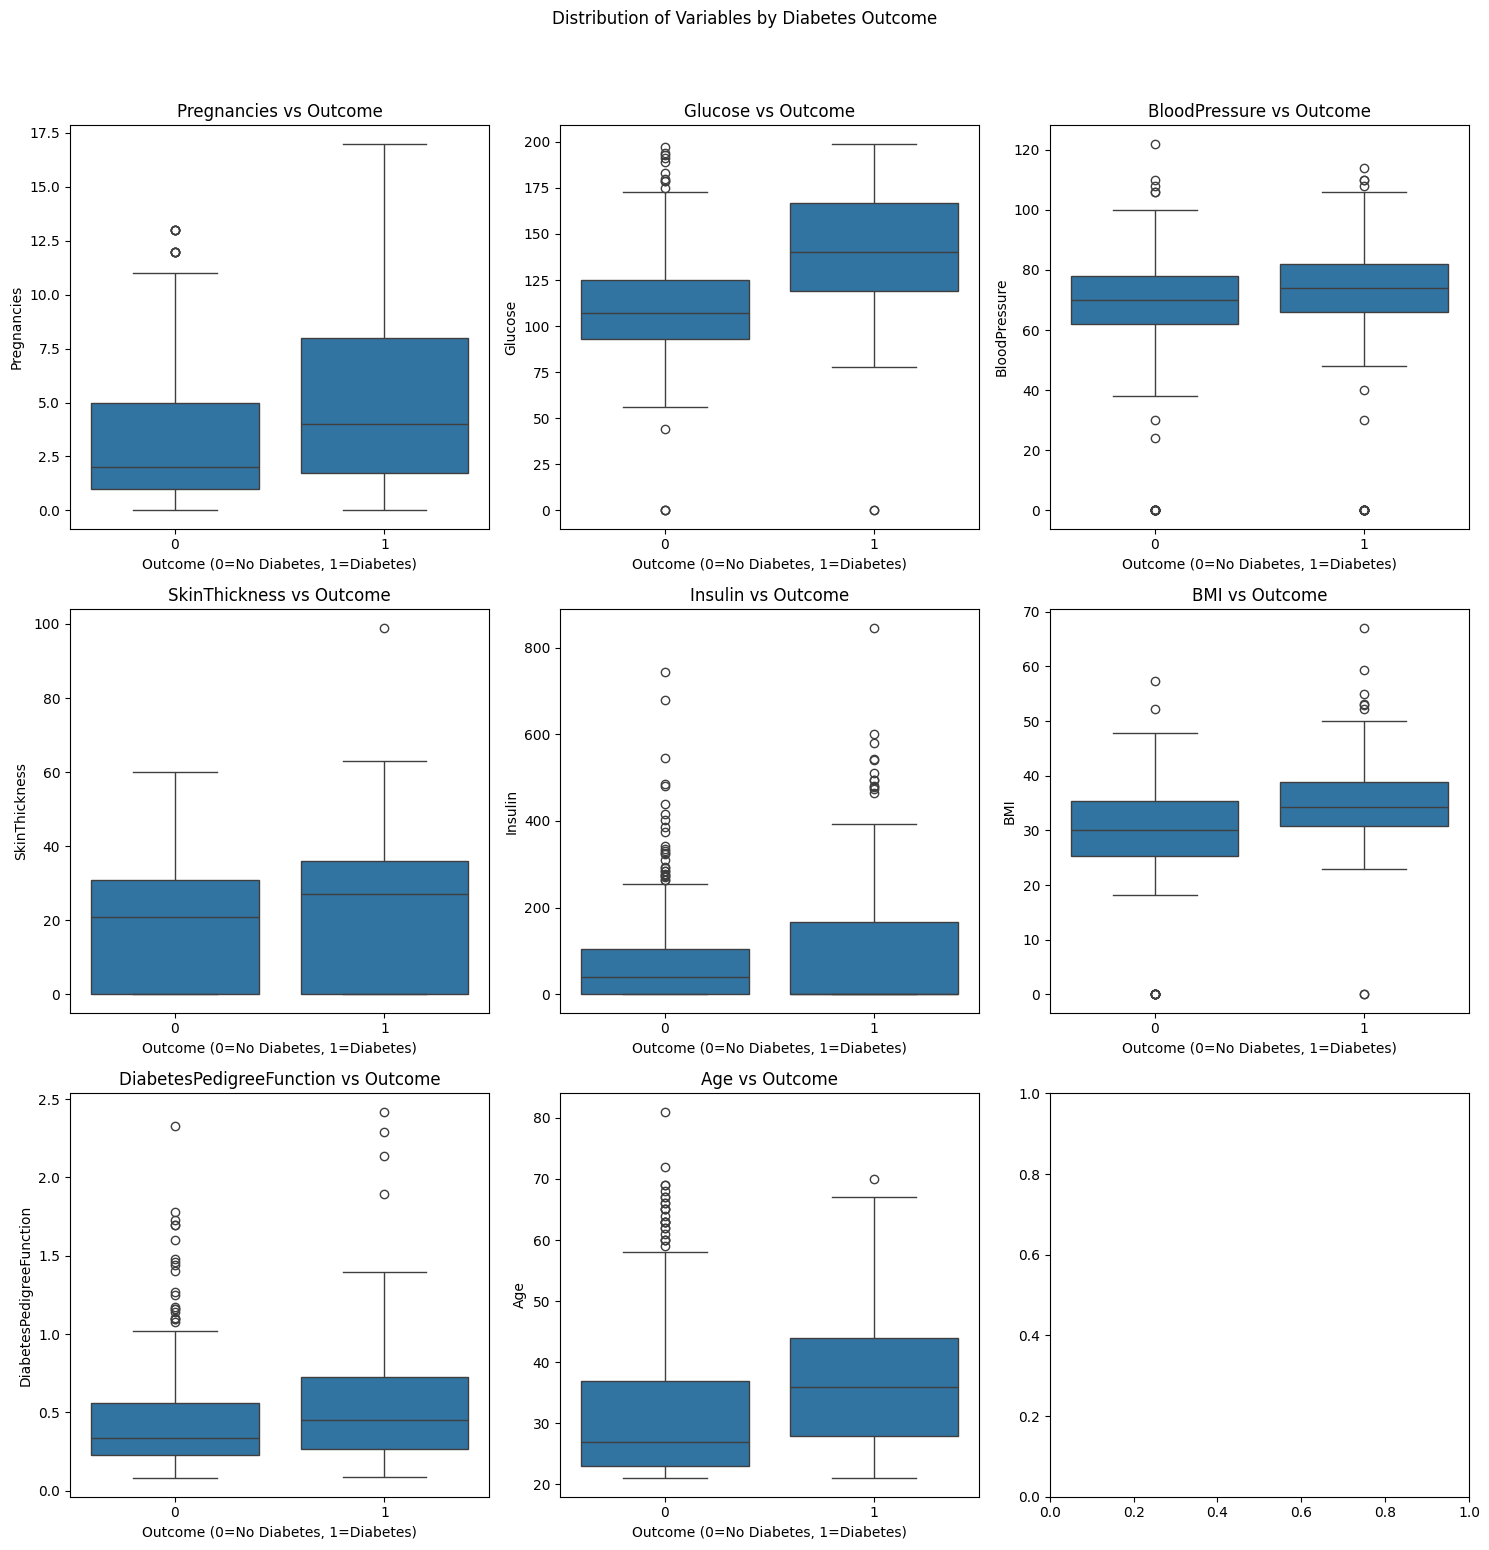

In [18]:

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Distribution of Variables by Diabetes Outcome', y=1.03)

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for ax, column in zip(axes.flatten(), columns):
    sns.boxplot(ax=ax, x='Outcome', y=column, data=data)
    ax.set_title(f'{column} vs Outcome')
    ax.set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(criterion='gini')
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))


Accuracy on test set: 0.7402597402597403


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.759016393442623
